**PREPARING THE DATA**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Read in the dataset
df = pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
# Seperate the features and label
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [7]:
# create the instance of the polyconverter
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
poly_converter

PolynomialFeatures(include_bias=False)

In [9]:
# create the poly features by fitting and transforming the featueres using the poly converter
poly_features = poly_converter.fit_transform(X)

In [10]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
#  Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 9), (60, 9), (140,), (60,))

In [13]:
# create an instance of a scaler to avoid mismatch of data
scaler = StandardScaler()

In [14]:
# fit the scaler instance to the train and test features
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
scaled_X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.59023161,
         0.41659155,  1.6137853 ],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  1.4978238 ,
         2.46478013,  2.08205295],
       [-0.84811893, -1.58789957, -1.02319564, ..., -1.05826214,
        -0.90147492, -0.74882387],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -1.03502374,
        -0.73652035, -0.03590138],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.26199091,
        -0.79680416, -0.78714505],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.32216251,
         0.92114819,  0.76625296]])

In [16]:
scaled_X_test

array([[-9.13394717e-01,  1.76259419e+00,  6.81685579e-01,
        -9.63975055e-01,  1.52122095e-02, -2.93048209e-01,
         2.31532893e+00,  1.56001049e+00,  3.69910106e-01],
       [ 1.23121149e+00,  2.36559587e-01, -1.19601922e+00,
         1.38103193e+00,  9.76521639e-01, -6.80562258e-01,
        -5.79325829e-02, -7.40162021e-01, -7.79189389e-01],
       [-4.60024728e-01, -4.07766136e-01,  3.50051150e-01,
        -6.82242743e-01, -5.06457342e-01, -1.10940195e-01,
        -6.39722074e-01, -1.69172158e-01,  3.57554301e-02],
       [-4.96816533e-01,  1.65407618e+00,  9.47927303e-01,
        -7.09383526e-01,  4.86260118e-01,  1.37061544e-01,
         2.10033570e+00,  1.77735495e+00,  6.78908133e-01],
       [-1.42610633e+00,  8.05649381e-02, -1.35015916e+00,
        -1.14433859e+00, -8.66050574e-01, -9.38134722e-01,
        -2.21679679e-01, -8.42466779e-01, -7.93375596e-01],
       [-1.56971305e+00, -5.02719400e-01, -4.11306765e-01,
        -1.16855131e+00, -1.00646472e+00, -8.680574

**CREATE THE MODEL**

In [17]:
# create an instance of a ElasticNetCV model
model = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99],eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [18]:
# Fit the model to the scaled X train dataset
model.fit(scaled_X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99], max_iter=1000000)

In [19]:
model.alpha_

0.008137347414040222

In [20]:
# predict on the test features
pred = model.predict(scaled_X_test)

In [21]:
pred

array([13.87580995, 19.35667775, 12.24280347, 16.64788136,  8.10505636,
        7.06452584, 20.15814224, 17.47210096, 10.53176599, 20.08097562,
        9.58248113, 14.0815677 , 12.03343424, 23.30128656, 19.63009159,
        9.2341922 , 12.15316475,  9.29187871,  8.50827127, 21.61312623,
        7.20370442, 19.26384019, 27.29299447, 24.61603563,  9.13052524,
       11.75259387, 20.51330734,  9.15656382, 12.69273393,  8.6175163 ,
        8.63955097, 20.15768796, 10.90650234,  6.87869436, 18.19492668,
        9.41374264, 10.31553125,  9.68157838,  7.49356893, 10.99498695,
       12.58546542, 10.57662058, 11.14302871,  7.4851951 , 11.39206116,
       10.30784634,  6.40069881, 15.50051975, 13.29381965, 22.62205186,
       10.3924609 , 13.17118146, 14.31054315, 11.88097908, 11.63330129,
        5.87036039, 25.04833886,  9.69924852, 17.42646883, 15.68215188])

In [25]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [26]:
# obtain the coefficient of the model
model.coef_

array([ 4.07820164,  0.23319525,  0.12315291, -2.58444911,  3.75342792,
       -0.16697565,  0.        ,  0.12630346, -0.        ])

In [27]:
# evaluate the error
error = y_test - pred

In [28]:
error

37     0.824190
109    0.443322
31    -0.342803
89     0.052119
66     1.394944
119   -0.464526
54     0.041858
74    -0.472101
145   -0.231766
142    0.019024
148    1.317519
112    0.018432
174   -0.533434
55     0.398713
141   -0.430092
149    0.865808
25    -0.153165
34     0.208121
170   -0.108271
39    -0.113126
172    0.396296
153   -0.263840
175   -0.292994
61    -0.416036
65     0.169475
50    -0.352594
42     0.186693
129    0.543436
179   -0.092734
2      0.682484
12     0.560449
133   -0.557688
90     0.293498
22    -1.278694
41    -1.094927
32     0.186257
125    0.284469
196    0.018422
158   -0.193569
180   -0.494987
16    -0.085465
186   -0.276621
144    0.256971
121   -0.485195
80     0.407939
18     0.992154
78    -1.100699
48    -0.700520
4     -0.393820
15    -0.222052
1      0.007539
43    -0.271181
102    0.489457
164    0.019021
9     -1.033301
155   -2.670360
36     0.351661
190    1.100751
33    -0.026469
45    -0.782152
Name: sales, dtype: float64

In [29]:
# Evaluate the error metrics
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [30]:
MAE

0.4744367227798925

In [31]:
MSE

0.4321902163324801

In [32]:
RMSE

0.6574117555478303

In [33]:
# Evaluate to find the optimal degree of the model
train_rmse = []
test_rmse = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99],eps=0.001, n_alphas=100, cv=5, max_iter=1000000)
    model.fit(scaled_X_train, y_train)
    
    train_pred = model.predict(scaled_X_train)
    test_pred = model.predict(scaled_X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    trainrmse = np.sqrt(train_mse)
    testrmse = np.sqrt(test_mse)
    
    train_rmse.append(trainrmse)
    test_rmse.append(testrmse)

In [34]:
train_rmse

[1.7394037390728394,
 0.5934319951596785,
 0.5195530369005272,
 0.4967328870043886,
 0.4958306801914728,
 0.5073404213924686,
 0.5077469118047508,
 0.5067802004503724,
 0.5056911919674641]

In [35]:
test_rmse

[1.5433108447898847,
 0.6574117555478303,
 0.6104106917384737,
 0.5908318489273904,
 0.5941517862826062,
 0.6048857433000395,
 0.6071301023494945,
 0.6075966484460877,
 0.6084663292576349]

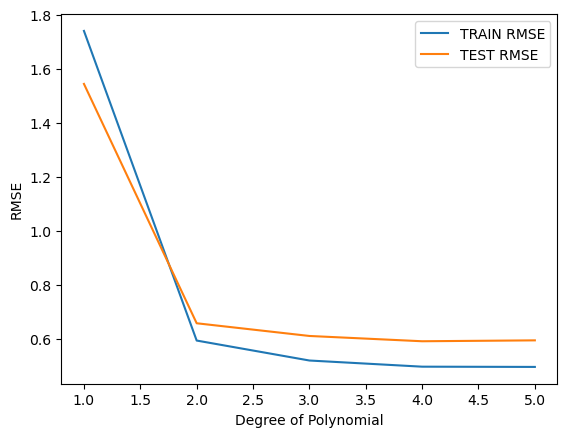

In [36]:
# Visualize the errors
plt.plot(range(1,6), train_rmse[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse[:5], label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

**FINDING THE OPTIMAL HYPERPARAMETER TUNING USING GRID SEARCH**

In [41]:
base_model = ElasticNet()
param_grid = {'alpha':[0.1,1,5,10,100], "l1_ratio":[0.1,0.5,0.7,0.95,0.99,1.00]}

gridModel = GridSearchCV(estimator=base_model,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=2)

In [42]:
gridModel.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.956e-01, tolerance: 2.817e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.995e-01, tolerance: 3.053e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.744e-01, tolerance: 

[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [43]:
gridModel.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.95)

In [44]:
gridModel.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

In [45]:
# check all the results from model
allResults = gridModel.cv_results_

In [46]:
allResults

{'mean_fit_time': array([0.04386535, 0.00698328, 0.00459676, 0.00519629, 0.00519681,
        0.00678067, 0.00696192, 0.0042697 , 0.00279827, 0.00258894,
        0.00145969, 0.00179863, 0.00339818, 0.00219889, 0.00199995,
        0.00159798, 0.00180149, 0.00219898, 0.0037982 , 0.00256481,
        0.00179939, 0.00219913, 0.00439744, 0.00450196, 0.00263329,
        0.0028007 , 0.0037971 , 0.00339832, 0.00324697, 0.00393734]),
 'std_fit_time': array([0.00378355, 0.00265871, 0.0010192 , 0.00146943, 0.0014689 ,
        0.00361757, 0.00136782, 0.00037233, 0.00098   , 0.00101522,
        0.00057244, 0.00074852, 0.00101852, 0.0004014 , 0.00063271,
        0.00048948, 0.0007475 , 0.00074857, 0.00074692, 0.00331689,
        0.00074809, 0.00074828, 0.00185438, 0.00240904, 0.00137179,
        0.00040007, 0.00159857, 0.0010202 , 0.00194806, 0.0019816 ]),
 'mean_score_time': array([0.00119963, 0.00100007, 0.00099926, 0.00099993, 0.00099936,
        0.00080137, 0.00039968, 0.0012013 , 0.00099988, 0.00

In [47]:
allResults = pd.DataFrame(allResults)

In [48]:
allResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043865,0.003784,0.001200,3.991605e-04,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-0.690535,-0.624851,-2.257885,-0.794783,-0.556331,-0.984877,0.641341,6
1,0.006983,0.002659,0.001000,6.326359e-04,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-0.604420,-0.572438,-1.991142,-0.741265,-0.606648,-0.903183,0.547075,5
2,0.004597,0.001019,0.000999,6.330150e-04,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-0.558331,-0.549094,-1.854974,-0.712094,-0.532991,-0.841497,0.510830,4
3,0.005196,0.001469,0.001000,6.217196e-07,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-0.552842,-0.566621,-1.653087,-0.802710,-0.412638,-0.797580,0.445721,1
4,0.005197,0.001469,0.000999,6.321837e-04,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-0.555953,-0.584508,-1.623629,-0.835830,-0.401733,-0.800331,0.434571,3
5,0.006781,0.003618,0.000801,4.006919e-04,0.1,1.0,"{'alpha': 0.1, 'l1_ratio': 1.0}",-0.556439,-0.588709,-1.618144,-0.834421,-0.399758,-0.799494,0.432366,2
6,0.006962,0.001368,0.000400,4.895129e-04,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-2.351760,-1.977754,-4.329938,-3.064692,-3.240754,-2.992980,0.811892,12
7,0.004270,0.000372,0.001201,4.015449e-04,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-2.567362,-1.632309,-4.014598,-3.384817,-2.960871,-2.911991,0.799756,11
8,0.002798,0.000980,0.001000,9.702201e-07,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-2.770876,-1.513479,-3.850247,-3.486197,-2.676081,-2.859376,0.803443,10
9,0.002589,0.001015,0.000400,4.895704e-04,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-2.568074,-1.128660,-3.280890,-2.963259,-1.922828,-2.372742,0.769644,9


In [49]:
grid_pred = gridModel.predict(scaled_X_test)

In [50]:
grid_pred

array([13.47875868, 19.59652186, 11.75705793, 15.94505233,  8.88945462,
        8.00149904, 20.45280607, 17.32155448, 10.18608775, 19.92255725,
       10.11157843, 13.73226912, 12.08935836, 22.85749983, 19.06770157,
        9.60063364, 12.59880573,  9.15409913,  8.86180055, 21.55683721,
        8.15629054, 18.72200262, 27.78027187, 24.85532221,  9.28355351,
       11.62797889, 21.02825139,  9.21264191, 12.30455718,  8.92414761,
        8.95359483, 19.96878516, 10.54287225,  7.76198471, 17.68149281,
        9.19860282, 10.11706152,  9.53236625,  8.27506122, 10.65653338,
       11.7393999 , 10.20247318, 10.78134975,  8.17820149, 11.2550515 ,
       10.31625545,  7.74296987, 15.4743685 , 12.90950657, 22.18265006,
       10.47604492, 13.04169991, 14.82264516, 11.53126192, 11.51124049,
        7.33708534, 25.51033703, 10.25935917, 17.75157454, 15.22116923])

In [51]:
# Evaluate the error metrics
MAE_grid = mean_absolute_error(y_test, grid_pred)
MSE_grid = mean_squared_error(y_test, grid_pred)
RMSE_grid = np.sqrt(MSE_grid)

In [52]:
MAE_grid,MSE_grid,RMSE_grid

(0.5765500516931594, 0.7545060780961604, 0.8686230932321339)

**CREATE THE FINAL MODEL**

In [58]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_one = ElasticNet(alpha=0.1, l1_ratio=0.95, max_iter=1000000)
model.fit(scaled_X_train, y_train)

model.coef_

pred = model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)


final_model = model.fit(X,y)

In [59]:
pred

array([14.15154523, 19.29126291, 12.33073088, 16.96970148,  8.02799269,
        6.9692839 , 20.11375689, 17.33402707, 10.43069087, 19.96895459,
        9.56698314, 13.94519767, 11.91919672, 23.36491962, 19.57656674,
        9.27437928, 12.30736674,  9.29524323,  8.56362373, 21.5226894 ,
        7.07782562, 19.34036294, 27.27421341, 24.5258487 ,  9.1664537 ,
       11.61726295, 20.71131378,  9.2888381 , 12.57123093,  8.40879585,
        8.57265095, 20.04401843, 10.83164051,  6.80610479, 18.1912198 ,
        9.47058408, 10.40677214,  9.70052745,  7.24184397, 10.85729917,
       12.84285366, 10.51306556, 11.25623052,  7.4219136 , 11.53539721,
       10.41249145,  6.04978709, 15.37077681, 13.18974961, 22.68731021,
       10.46643642, 13.01978363, 14.55783365, 11.89322419, 11.48227996,
        5.62267651, 25.05097512,  9.69134841, 17.44173053, 15.60559271])

In [55]:
MAE,MSE,RMSE

(0.43619389336623265, 0.37260121258864204, 0.6104106917384737)

In [60]:
prediction = final_model.predict([[78,54,13.8]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [61]:
prediction

array([16.39414165])